# Machine Learning

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

## Data Preprocessing

In [2]:
# load dataset
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1VbebXHXhuv8FBxXninhMzydTcKReFNxdZWnzJxicGd0/export?format=csv')
df.head()

,customer_id,gender,senior_citizen,partner,dependent,tenure,contract,payment_method,monthly_charges,churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,monthly,Electronic check,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,bimonthly,Mailed check,56.95,No
2,3668-QPYBK,Male,0.0,No,No,2.0,monthly,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,bimonthly,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0.0,No,No,2.0,monthly,Electronic check,70.70,Yes


In [3]:
# general info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      7037 non-null   object 
 1   gender           7030 non-null   object 
 2   senior_citizen   7034 non-null   float64
 3   partner          7030 non-null   object 
 4   dependent        7027 non-null   object 
 5   tenure           7029 non-null   float64
 6   contract         7033 non-null   object 
 7   payment_method   7035 non-null   object 
 8   monthly_charges  7036 non-null   float64
 9   churn            7046 non-null   object 
dtypes: float64(3), object(7)
memory usage: 550.6+ KB


In [4]:
# head
df.head()

,customer_id,gender,senior_citizen,partner,dependent,tenure,contract,payment_method,monthly_charges,churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,monthly,Electronic check,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,bimonthly,Mailed check,56.95,No
2,3668-QPYBK,Male,0.0,No,No,2.0,monthly,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,bimonthly,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0.0,No,No,2.0,monthly,Electronic check,70.70,Yes


In [5]:
# separate column names based on type
numericals = df.select_dtypes(include='number').columns.tolist()
categoricals = df.select_dtypes(include='object').columns.tolist()

print(f"Numericals columns are {numericals}")
print(f"Categoricals columns are {categoricals}")

Numericals columns are ['senior_citizen', 'tenure', 'monthly_charges']
Categoricals columns are ['customer_id', 'gender', 'partner', 'dependent', 'contract', 'payment_method', 'churn']


## Missing Values Handling

In [6]:
# check missing values per columns
df.isna().sum()

,0
customer_id,9
gender,16
senior_citizen,12
partner,16
dependent,19
tenure,17
contract,13
payment_method,11
monthly_charges,10
churn,0


In [7]:
# percentage version
df.isna().sum() * 100 / len(df)

,0
customer_id,0.127732
gender,0.227079
senior_citizen,0.170309
partner,0.227079
dependent,0.269657
tenure,0.241272
contract,0.184502
payment_method,0.156117
monthly_charges,0.141924
churn,0.000000


Since number of rows with missing values are relatively small, we can simply drop them (simple, yet the best option)

In [8]:
# we can impute missing values if they are significant in number
# Rule of thumb (not always correct, tho)
# Numeric col --> data['column_name'].fillna(data['column_name'].median)
# Categorical col --> data['column_name'].fillna(data['column_name'].mode)

In [9]:
# sample
df['monthly_charges'].fillna(df['monthly_charges'].median)

,monthly_charges
0,29.85
1,56.95
2,53.85
3,42.3
4,70.7
...,...
7041,54.2
7042,70.75
7043,78.45
7044,83.45


In [10]:
# sample
df['gender'].fillna(df['gender'].mode)

,gender
0,Female
1,Male
2,Male
3,Male
4,Female
...,...
7041,<bound method Series.mode of 0 Female\n1...
7042,Female
7043,Female
7044,Female


### Drop missing values

In [11]:
df = df.dropna()

In [12]:
# sanity check
df.isna().sum()

,0
customer_id,0
gender,0
senior_citizen,0
partner,0
dependent,0
tenure,0
contract,0
payment_method,0
monthly_charges,0
churn,0


## Duplicate Handling

In [13]:
# duplicate checking
df.duplicated().sum()

np.int64(13)

In [14]:
# drop them
df = df.drop_duplicates()

In [15]:
# sanity check
df.duplicated().sum()

np.int64(0)

## Feature Encoding

In [16]:
for col in categoricals:
  print("---"*20)
  print(f"Unique values for column {col}")
  print(df[col].value_counts())
  print("\n")

------------------------------------------------------------
Unique values for column customer_id
customer_id
3186-AJIEK    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
9237-HQITU    1
             ..
4183-MYFRB    1
4190-MFLUW    1
9959-WOFKT    1
8191-XWSZG    1
3655-SNQYZ    1
Name: count, Length: 6910, dtype: int64


------------------------------------------------------------
Unique values for column gender
gender
Male      3494
Female    3416
Name: count, dtype: int64


------------------------------------------------------------
Unique values for column partner
partner
No     3578
Yes    3332
Name: count, dtype: int64


------------------------------------------------------------
Unique values for column dependent
dependent
No     4853
Yes    2057
Name: count, dtype: int64


------------------------------------------------------------
Unique values for column contract
contract
monthly      3810
quarterly    1655
bimonthly    1445
Name: count, dtype: int64


----------------

In [17]:
# drop customer_id (identifier, useless)
df = df.drop(columns='customer_id')

In [18]:
# label encode gender columns
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [19]:
# label encode other binary columns
binary_map = {
    'No':0,
    'Yes':1
}

binary_cols = ['partner','dependent','churn']

for col in binary_cols:
  df[col] = df[col].map(binary_map)

In [20]:
# label encode contract column
contract_map = {
    'monthly': 0,
    'bimonthly':1,
    'quarterly':2
}

df['contract'] = df['contract'].map(contract_map)

In [21]:
# One Hot Encode payment_method column
onehot_payment_method = pd.get_dummies(df['payment_method'], prefix='pay')
df = df.join(onehot_payment_method)

In [22]:
# drop original payment_method column
df = df.drop(columns='payment_method')

In [23]:
# check
df.head()

,gender,senior_citizen,partner,dependent,tenure,contract,monthly_charges,churn,pay_Bank transfer (automatic),pay_Credit card (automatic),pay_Electronic check,pay_Mailed check
1,1,0.0,0,0,34.0,1,56.95,0,False,False,False,True
2,1,0.0,0,0,2.0,0,53.85,1,False,False,False,True
3,1,0.0,0,0,45.0,1,42.30,0,True,False,False,False
4,0,0.0,0,0,2.0,0,70.70,1,False,False,True,False
5,0,0.0,0,0,8.0,0,99.65,1,False,False,True,False


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6910 entries, 1 to 7031
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         6910 non-null   int64  
 1   senior_citizen                 6910 non-null   float64
 2   partner                        6910 non-null   int64  
 3   dependent                      6910 non-null   int64  
 4   tenure                         6910 non-null   float64
 5   contract                       6910 non-null   int64  
 6   monthly_charges                6910 non-null   float64
 7   churn                          6910 non-null   int64  
 8   pay_Bank transfer (automatic)  6910 non-null   bool   
 9   pay_Credit card (automatic)    6910 non-null   bool   
 10  pay_Electronic check           6910 non-null   bool   
 11  pay_Mailed check               6910 non-null   bool   
dtypes: bool(4), float64(3), int64(5)
memory usage: 512.9 

## Classification Modeling

In [25]:
# split data
from sklearn.model_selection import train_test_split

feature = df.drop(columns='churn')
target = df[['churn']]

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [26]:
# convert data into numpy arrays
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy().ravel()

X_test = feature_test.to_numpy()
y_test = target_test.to_numpy().ravel()

In [27]:
# train  decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
# model performance
from sklearn.metrics import accuracy_score

# performance on training data
y_train_pred = dectree.predict(X_train)
print(f'Akurasi Decision Tree pada train data: {accuracy_score(y_train,y_train_pred):.4f}')

# performance on testing data
y_test_pred = dectree.predict(X_test)
print(f'Akurasi Decision Tree pada test data: {accuracy_score(y_test,y_test_pred):.4f}')

Akurasi Decision Tree pada train data: 0.9967
Akurasi Decision Tree pada test data: 0.7004


In [31]:
# train  random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# model performance
from sklearn.metrics import accuracy_score

# performance on training data
y_train_pred = rfc.predict(X_train)
print(f'Akurasi Random Forest pada train data: {accuracy_score(y_train,y_train_pred):.4f}')

# performance on testing data
y_test_pred = rfc.predict(X_test)
print(f'Akurasi Random Forest pada test data: {accuracy_score(y_test,y_test_pred):.4f}')

Akurasi Random Forest pada train data: 0.9967
Akurasi Random Forest pada test data: 0.7562


Dari sini, Random Forest adalah model yang lebih baik

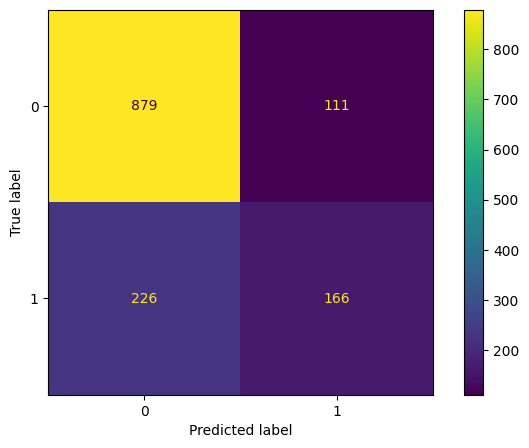

In [33]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8,5))

cm = confusion_matrix(y_test, y_test_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rfc.classes_)
disp.plot(ax=ax)
plt.show()

# Selesai